<a href="https://colab.research.google.com/github/vparro/MLprobabilistico/blob/master/ReedFrostModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações básicas - *veja se são necessárias para você*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Referência

Inspirado no material disponível em:

https://math.unm.edu/~sulsky/mathcamp/

https://esc.fnwi.uva.nl/thesis/centraal/files/f70136284.pdf


# O modelo matemático para um grupo pequeno

Há no senso comum o entendimento que há uma chance de "pegar" uma doença. Supondo que a probailidade que representa esta sensação seja $\mathbf{p}$ e que a probilidade de escapar desta doença seja $\mathbf{q}$. Vamos admitir um cenário onde tenhamos uma família de três pessoas $\mathbf{N}=3$ e um dos individuos estaje **i**nfectado (**I**). Supondo que neste caso $\mathbf{p}=0.4$ logo $\mathbf{q}=0.6$. Admitindo este cenário pode-se explorar as seguintes progressões da doença ($P_i$ - infectado e $\overline{P_i}$ - não infectado) :

Pensando em casos:

1.   Apenas o primeiro **ifectado** desenvovle a doença.
2.   O **infectado** transmite para um dos outros dois **suscetíveis** apenas.
3.   Os dois **sucetíveis** são infectados um após o outro.
4.   Ambos os **suscetíveis** são infectados simultaneamente.

Traduzindo em **cadeias** de transmissão:

1.   1 $\rightarrow$ 0
2.   1 $\rightarrow$ 1 $\rightarrow$ 0
3.   1 $\rightarrow$ 1 $\rightarrow$ 1
4.   1 $\rightarrow$ 2

Traduzindo em **probabilidades** de cada cadeia de transmissão:


1.   $\overline{P_1}$  e $\overline{P_2}$ - $\mathbf{q^2}$ 
2.   $\overline{P_1}$  e $P_2$ - $\mathbf{pq^2}$ **ou** $P_1$  e $\overline{P_2}$ - $\mathbf{pq^2}$ 
3.   $\overline{P_1}$  e $P_2$ $\rightarrow$ $P_1$  e $P_2$ - $\mathbf{p^2q}$  **ou** $P_1$  e $\overline{P_2}$ $\rightarrow$ $P_1$  e $P_2$ - $\mathbf{p^2q}$
4.   $P_1$  e $P_2$ -  $\mathbf{p^2}$ 



In [3]:
p = 0.4
q = 1 - p
C1 = q**2
C2 = 2*p*(q**2)
C3 = 2*q*(p**2)
C4 = p**2
print(C1,C2,C3,C4, C3+C4, C1+C2+C3+C4)

0.36 0.288 0.19200000000000003 0.16000000000000003 0.3520000000000001 1.0


Considerando as probabilidades calculadas para cada uma das sequências, aplicada um cenário de 1000 famílias com três integrantes, pode-se estimar que cerca de **360** famílias, atigidas pela doença, terão apenas 1 infectado, **288** famílias terão pelo menos 1 infectado e **352** famílias todos serão infectados.

Se generalizarmos a análise pode-se dizer que o número de infectados $\mathbf{I_{t}}$ na próxima geração de infectados será $\mathbf{I_{t+1}}$. O termo $\mathbf{t}$ indica a geração da epidemia e indica com uma certa *imprecisão* a escala de tempo.

\begin{align*}
P(I_{t+1}=i_{t+1}\vert S_t=s_t,I_t=i_t) \sim \binom{s_t}{i_t} (1-q^i_t)^{I_{t+1}} (q)^{i_t(s_t-i_{t+1})}, s_t \geq i_{t+1}
\end{align*}

# Gerneralizando o modelo

A partir da proposta que o contágio é dependente de uma probabilidade $\mathbf{p}$ de transmissão da doença,  que corresponde a uma probabilidade $\mathbf{q}$ de escapar de ser contaminado, pode-se estabelecer um modelo que seja capaz de representar a cadeia de transmissão.

$$ \begin{split}
   I_{t+1} & \sim binomial(S(t),p) \\
   S_{t+1} & = S_t - I_{t+1}  \\
   R_{t+1} & = R_t + I_t
   \end{split}$$

   Observe a smelhança com o modelo determinístico exceto o fato do número de infectados ser um valor randômico governado pela distribuição Binomial.


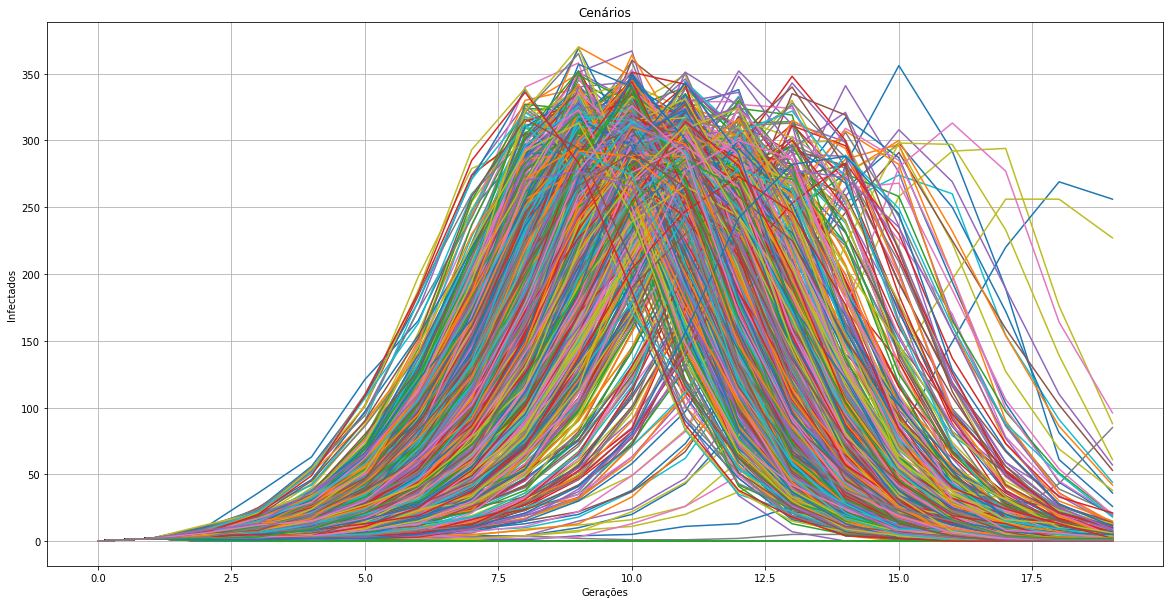

In [4]:
#Modelo Reed-Frost 
ngen=20;      # número de gerações
Sinit=2000;   # população suscetível
Iinit=2;      # infectados
Rinit=0;      # removidos / recuperados

q=0.999;

nsims=1000;     # número de simulações

plt.figure(figsize=(20,10))
x , y = list(),list()
M = np.zeros((nsims-1,ngen-1))

for i in range(1,nsims-1): 
    S=np.linspace(0,1,ngen)-np.linspace(0,1,ngen)
    I=np.linspace(0,1,ngen)-np.linspace(0,1,ngen)
    R=np.linspace(0,1,ngen)-np.linspace(0,1,ngen)
    S[1]=Sinit;
    I[1]=Iinit;
    R[1]=Rinit;
    for j in range(1,ngen-1):
        # np.random.binomial(n, p, 1000)
        I[j+1]=np.random.binomial(S[j],1-q**I[j],1);
        S[j+1]=S[j]-I[j+1];
        R[j+1]=R[j]+I[j];
        M[i,j] = I[j];  

    y.append(I)
    plt.plot(I)
    plt.xlabel('Gerações')
    plt.ylabel('Infectados')
    plt.title('Cenários')
    plt.grid(True)



# Análise dos cenários para cada geração nova de infectados

Observe que para cada nova geração a distribuição estatística varia e pode-se observar o comportamento da distribuição Binomial. Neste sentido pode-se observar quem "governa" a incerteza da evolução da epidemia. A linha pontilhada em cada histograma representa a média para cada geração.

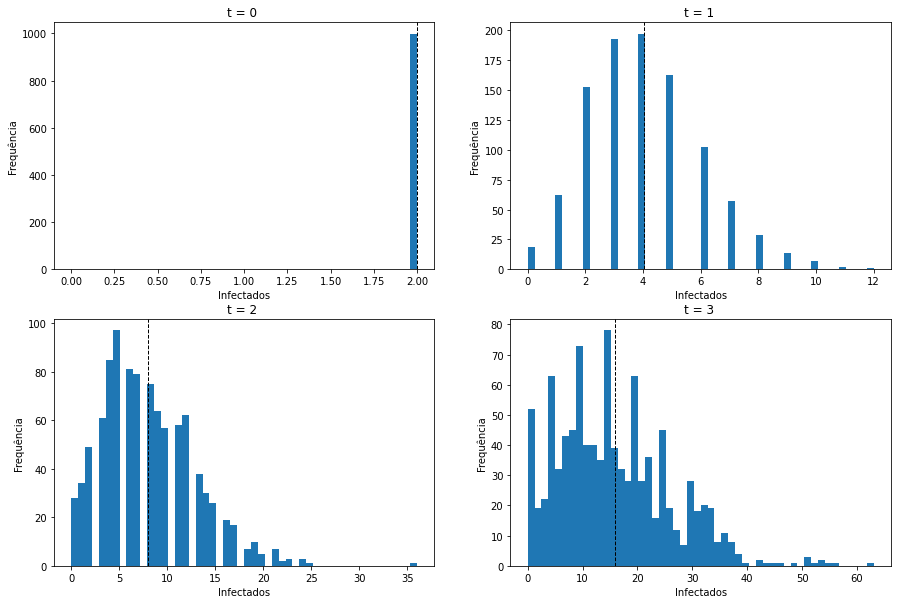

In [5]:
#print(M.shape)

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.hist(M[:,1],bins=50)
plt.axvline(M[:,1].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Infectados')
plt.ylabel('Frequência')
plt.title('t = 0 ')
plt.subplot(222)
plt.hist(M[:,2],bins=50)
plt.axvline(M[:,2].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Infectados')
plt.ylabel('Frequência')
plt.title('t = 1 ')
plt.subplot(223)
plt.hist(M[:,3],bins=50)
plt.axvline(M[:,3].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Infectados')
plt.ylabel('Frequência')
plt.title('t = 2 ')
plt.subplot(224)
plt.hist(M[:,4],bins=50)
plt.axvline(M[:,4].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Infectados')
plt.ylabel('Frequência')
plt.title('t = 3 ')
plt.show()


# Evolução da média e desvio padrão

Para uma visão mais clara podemos visualizar a média e o desvio padrão para cada geração.

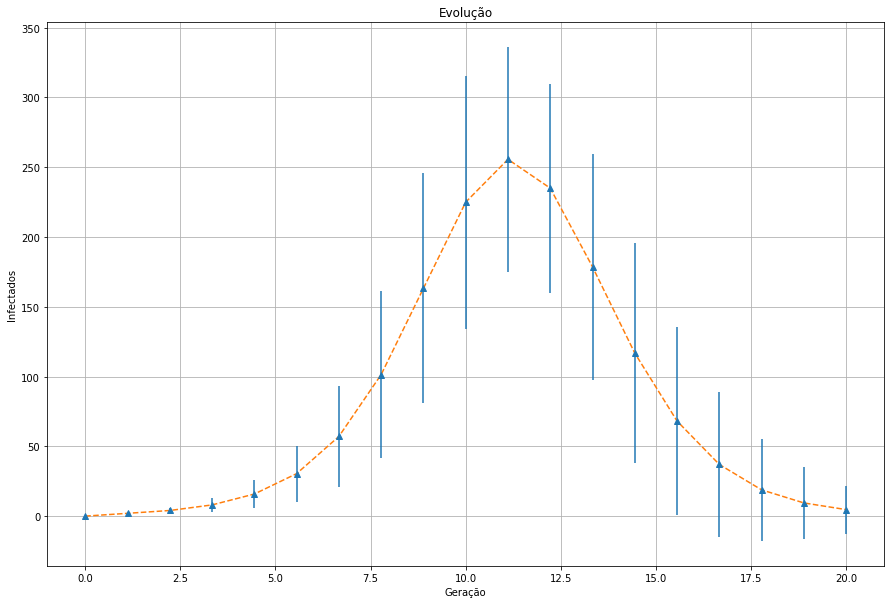

In [6]:
a = M.mean(0)
e = M.std(0)
x = np.linspace(0,ngen, ngen-1)
plt.figure(figsize=(15,10))
plt.xlabel('Geração')
plt.ylabel('Infectados')
plt.title('Evolução')
plt.grid(True)

plt.errorbar(x, a, e, linestyle='None', marker='^')
plt.plot(x, a, linestyle='dashed')